<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/Eq_onda_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Pseudoespectral method for one dimensional wave equation 


# tpsi + colpsi = 0;  unidimensional


N = 200

L0 = 10

col = np.cos(np.arange(N)*math.pi / (N-1))     # collocation points

# Mapping 1

#x = L0 * (col/(np.sqrt(1-col**2)))                    

#xcol = 2*L0**2/((L0**2/x**2-1)**2*x**3)             # dcol/dx

# Mapping 2

x = L0 * np.arctanh(col)                       

xcol = (1 - np.tanh(x/L0)**2)/L0 

# Base Matrix (Tchebyshev Polinomials):

T = np.zeros([N+2,N])
xT = np.zeros([N+2,N])
colT = np.zeros([N+2,N])


T[0,] = 1
T[1,] = col

for i in range(2,N+2):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

# Derivada Matriz Base:

colT[0,] = 0
colT[1,] = 1

xT[0,] = xcol*colT[0,]
xT[1,] = xcol*colT[1,]

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx


psi = T[0:N,:]   
xpsi = xT[0:N,:]


# Initial conditions

u = (0.3)**(1/2)


f_0 = np.exp(-(x**2)/(u**2))              # exact solution in t=0



inv_psi = np.linalg.inv(psi)
  

a0 = np.dot(f_0, inv_psi)  # coeficients a(0)

phi = np.dot(a0, psi)      # exact solution in t=0





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in arctanh


In [37]:
# Plot: Initial Conditions

M = 3000

xplot = np.linspace(-30,30,M)

colplot = np.tanh(xplot/L0)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in range(2,N+2):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N,:] 


f_plot0 = np.exp(-((xplot)**2)/(u)**2)    

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2 

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - f_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)

np.shape(f_plot0)

(3000,)

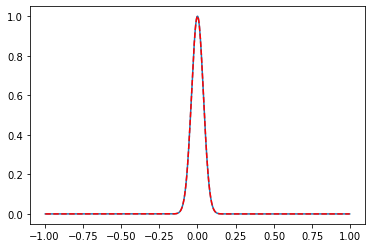

In [ ]:
plt.plot(colplot, phiplot, colplot, f_plot0, "--r")

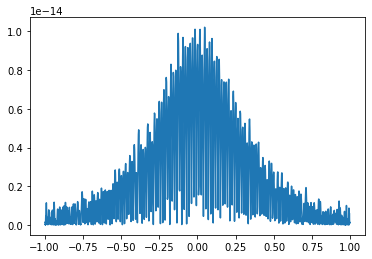

In [ ]:
plt.plot(colplot, erro)

In [38]:
# Runge Kutta 4th order

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It) 

phi_set = np.zeros([It,M])

#phi0_set = np.zeros([0,It])

for i in range(It): 

  xphi = np.dot(a0, xpsi)
  da = np.dot(- xphi, inv_psi) 
  K1 = h*(da)

  xphi = np.dot(a0 + K1/2, xpsi)
  da = np.dot(- xphi, inv_psi) 
  K2 = h*(da)

  xphi = np.dot(a0 + K2/2, xpsi)
  da = np.dot(- xphi, inv_psi)  
  K3 = h*(da)

  xphi = np.dot(a0 + K3, xpsi)
  da = np.dot(- xphi, inv_psi) 
  K4 = h*(da)
  
  a0 = a0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set[i,:] = np.dot(a0, psiplot)

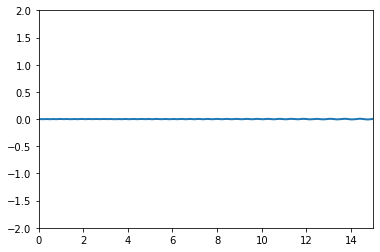

In [39]:
# Animation plot

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = xplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = phi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=2000, interval=2, blit=True)

HTML(anim.to_html5_video())